In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from typing import Literal
from numpy.typing import NDArray

In [4]:
df = pd.read_csv('datasets/Salary_dataset.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [6]:
x = df['YearsExperience'].values
y = df['Salary'].values

In [7]:
x_label = 'Years of Experience'
y_label = 'Salary'

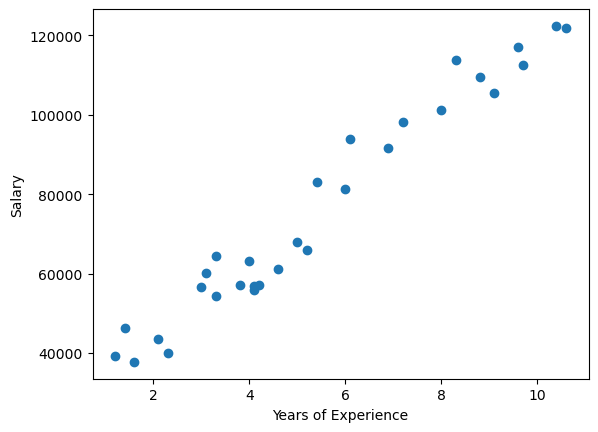

In [8]:
plt.scatter(x, y)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Cost Functions

#### Mean Absolute Error (MAE)

\begin{align*}
    MAE = \frac{1}{n} \sum_{i = 1}^{n} |y_i - y'|
\end{align*}

In [135]:
def mae(y_true: NDArray, y_pred: NDArray):
    if len(y_true) != len(y_pred):
        raise ValueError(f'Length mismatch. {len(y_true)} != {len(y_pred)}')
    return np.sum(np.abs(y_true - y_pred)) / len(y_true)

#### Meas Squared Error (MSE)

\begin{align*}
    MSE = \frac{1}{n} \sum_{i = 1}^{n} (y_i - y')^2
\end{align*}

In [136]:
def mse(y_true: NDArray, y_pred: NDArray):
    if len(y_true) != len(y_pred):
        raise ValueError(f'Length mismatch. {len(y_true)} != {len(y_pred)}')
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

#### Root Mean Square Error (RMSE)

\begin{align*}
    RMSE = \sqrt(MSE)
\end{align*}

In [137]:
def rmse(y_true: NDArray, y_pred: NDArray):
    return np.sqrt(mse(y_true, y_pred))

### Ordinary Least Squares

\begin{align*}
    m &= \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \\
    \\
    c &= y_i - mx_i
\end{align*}

In [13]:
def slope_ols(x: NDArray, y: NDArray):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    return np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

In [14]:
m_ols = slope_ols(x_train, y_train)
sample_index = np.random.choice(range(1, x_train.shape[0]))
c = y_train[sample_index] - m_ols * x_train[sample_index]

print(f'Sample index: {sample_index}, slope: {m_ols}, y-intercept: {c}')

Sample index: 5, slope: 9339.081723815194, y-intercept: 17504.764932357706


In [15]:
y_pred_ols = np.array([(m_ols * x) + c for x in x_test])

print('Predicted values:', y_pred_ols)

Predicted values: [108093.85765337  64200.17355143  95019.14324002  67935.80624096
  48323.73462095  52993.27548286 114631.21486004  99688.68410193
  55795.        ]


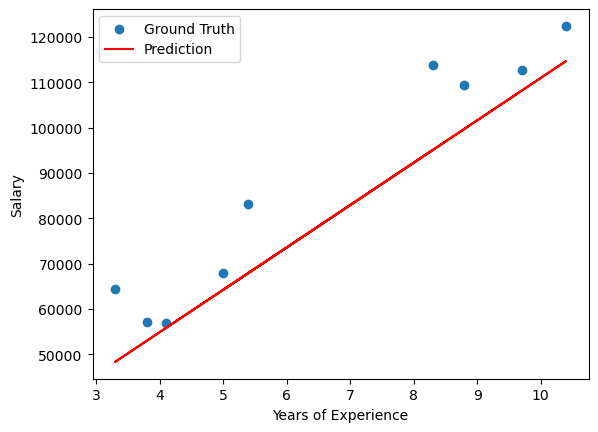

In [16]:
plt.scatter(x_test, y_test, label='Ground Truth')
plt.plot(x_test, y_pred_ols, color='red', label='Prediction')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

In [17]:
print('MAE:', mae(y_test, y_pred_ols))
print('MSE:', mse(y_test, y_pred_ols))
print('RMSE:', rmse(y_test, y_pred_ols))

MAE: 9023.790027605246
MSE: 116832523.40297152
RMSE: 10808.909445590314


### Normal Equation

\begin{align*}
    \beta = (X^T X)^{-1} X^T y \\
\end{align*}

Where,
- $X$ is the design matrix. $X = \begin{bmatrix}
    1 & X_1 \\
    1 & X_2 \\
    \vdots & \vdots \\
    1 & X_n
\end{bmatrix}$.
- $y$ is the output/target. $y = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}$
- $\beta$ = $\begin{bmatrix}
    c \\
    m
\end{bmatrix}$

In [18]:
def apply_normal_equation(x: NDArray, y: NDArray):
    coeff_vector = np.ones_like(x)
    X = np.stack((coeff_vector, x), axis=1)
    X_T = np.transpose(X)
    return np.linalg.inv((X_T @ X)) @ (X_T @ y) 

In [19]:
beta = apply_normal_equation(x_train, y_train)
c = beta[0]
m = beta[1]

print('Slope:', m)
print('y-intercept', c)

Slope: 9339.081723815187
y-intercept 24985.530162511684


In [20]:
y_pred_norm = (m * x_test) + c

print('Predicted values:', y_pred_norm)

Predicted values: [115574.62288352  71680.93878159 102499.90847018  75416.57147111
  55804.4998511   60474.04071301 122111.98009019 107169.44933209
  63275.76523015]


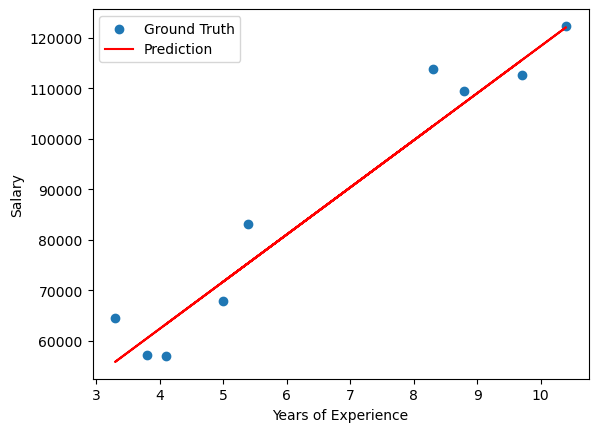

In [21]:
plt.scatter(x_test, y_test, label='Ground Truth')
plt.plot(x_test, y_pred_norm, color='red', label='Prediction')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

In [22]:
print('MAE:', mae(y_test, y_pred_norm))
print('MSE:', mse(y_test, y_pred_norm))
print('RMSE:', rmse(y_test, y_pred_norm))

MAE: 5161.328710400193
MSE: 37784662.46621329
RMSE: 6146.923007994593


### Gradient Descent using MSE:

\begin{align*}
    MSE &= \frac{1}{n} \sum_{i=1}^{n} (y - y')^2 \\
        &= \frac{1}{n} \sum_{i=1}^{n} (y - (mx+c))^2 \\
        &= \frac{1}{n} \sum_{i=1}^{n} (y - mx - c)^2 \\ 
        &= f(m, c) \\
        \\
    \text{Say,} \\
        g(m, c) &= (y - mx - c) \\
        h(g(m, c)) &= g^2 = (y - mx - c)^2 \\
        \\
    \text{According to chain rule,} \\
        \text{If, } f(x) &= h(g(x)) \\
        \frac{df}{dx} &= \frac{dh}{dg} \cdot \frac{dg}{dx} \\
        \\
    \text{Here,} \\
        \frac{\partial h}{\partial g} &= 2g, \\
        \frac{\partial g}{\partial m} &= -x, \\
        \frac{\partial g}{\partial c} &= -1 \\
        \\
    \frac{\partial f}{\partial m} &= \frac{1}{n} \sum_{i=1}^{n} \frac{\partial h}{\partial g} \cdot \frac{\partial g}{\partial m} \\
        &= \frac{1}{n} \sum_{i=1}^{n} 2g(-x) \\
        &= \frac{1}{n} \sum_{i=1}^{n} 2(y - mx - c)(-x) \\
        &= \frac{2}{n} \sum_{i=1}^{n} x(mx + c - y) \\
        \\
    \frac{\partial f}{\partial c} &= \frac{1}{n} \sum_{i=1}^{n} \frac{\partial h}{\partial g} \cdot \frac{\partial g}{\partial c} \\
        &= \frac{1}{n} \sum_{i=1}^{n} 2g(-1) \\
        &= \frac{1}{n} \sum_{i=1}^{n} 2(y - mx - c)(-1) \\
        &= \frac{2}{n} \sum_{i=1}^{n} (mx + c - y) \\
        \\
    \nabla f(m, c) &= \begin{bmatrix}
        \frac{\partial f}{\partial m} \\
        \frac{\partial f}{\partial c}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        \frac{2}{n} \sum_{i=1}^{n} x(mx + c - y) \\
        \frac{2}{n} \sum_{i=1}^{n} (mx + c - y)
    \end{bmatrix}
\end{align*}

**Note:** If we use $\frac{1}{2n}$ instead of $\frac{1}{n}$ in the cost function (common convention), the factor of 2 cancels out, giving simpler gradients:
\begin{align*}
    \nabla f(m, c) &= \begin{bmatrix}
        \frac{1}{n} \sum_{i=1}^{n} x(mx + c - y) \\
        \frac{1}{n} \sum_{i=1}^{n} (mx + c - y)
    \end{bmatrix}
\end{align*}

**Matrix notation** (where $\mathbf{x}, \mathbf{y}$ are column vectors of size $n \times 1$):
\begin{align*}
    \nabla f(m, c) &= \begin{bmatrix}
        \frac{1}{n} \mathbf{x}^T (m\mathbf{x} + c\mathbf{1} - \mathbf{y}) \\
        \frac{1}{n} \mathbf{1}^T (m\mathbf{x} + c\mathbf{1} - \mathbf{y})
    \end{bmatrix}
\end{align*}

where $\mathbf{1}$ is a column vector of ones with size $n \times 1$.

In [23]:
def gradient_descent(x: NDArray, y: NDArray, initial_slope: float = 10.0, initial_intercept: float = 10.0, lr: float = 0.0001, epoch = 20, log: bool = False):
    m = initial_slope
    c = initial_intercept
    n = len(x)
    one_vec = np.ones_like(x)
    gradients = []
    width = int(np.log10(epoch) + 1) 
    
    for i in range(epoch):
        y_pred = m * x + c
       
        if log: 
            print(f'Epoch: {i + 1:{width}}, MSE: {mse(y, y_pred)}')
            
        error = (m * x) + (c * one_vec) - y
        grad_m = (1 / n) * (x.T @ error)
        grad_c = (1 / n) * (one_vec.T @ error)
        
        m = m - lr * grad_m
        c = c - lr * grad_c
        gradients.append([m, c])
        
    return np.array(gradients)

In [24]:
grads = gradient_descent(x_train, y_train, epoch=1500, lr=0.01)

Minimum MSE: 37512956.03, Epoch: 1258


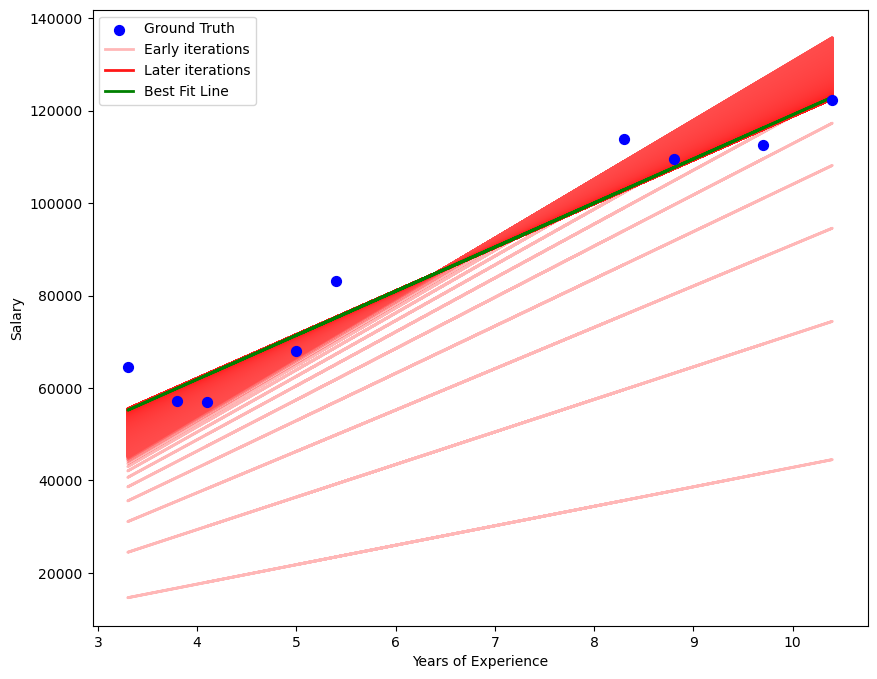

In [25]:
plt.figure(figsize=(10, 8))

n_grads = len(grads)
min_mse, index = np.inf, -1

for i in range(n_grads):
    y_pred = grads[i][0] * x_test + grads[i][1]
    error = mse(y_test, y_pred)
    
    if error < min_mse:
        min_mse = error
        index = i
        
    intensity = 1 - (i / n_grads) * 0.7  
    color = (1.0, intensity * 0.3, intensity * 0.3) 
    
    alpha = 0.4 + (i / n_grads) * 0.6 
    plt.plot(x_test, y_pred, color=color, alpha=alpha, linewidth=2)

plt.scatter(x_test, y_test, label='Ground Truth', color='blue', s=50, zorder=5)

plt.plot([], [], color=(1.0, 0.3, 0.3), alpha=0.4, linewidth=2, label='Early iterations')
plt.plot([], [], color=(1.0, 0.09, 0.09), alpha=1.0, linewidth=2, label='Later iterations')
plt.plot(x_test, np.stack((x_test, np.ones_like(x_test)), axis=1) @ grads[index].T, color='green', linewidth=2, label='Best Fit Line')

print(f'Minimum MSE: {min_mse:.2f}, Epoch: {index + 1}')
    
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

### Multivariate Linear Regression

\begin{align*}
    y' &= w_1x_1 + w_2x_2 + w_3x_3 + \cdots + w_px_p + b
    \\ \\
    MSE = f(\mathbf{w}) &= \frac{1}{2n} \sum_{i=1}^{n} (y_i - y'_i)^2 \\
                        &= \frac{1}{2n} \sum_{i=1}^{n} (y_i - (w_1x_{1,i} + w_2x_{2,i} + \cdots + w_px_{p,i} + b))^2
    \\ \\
    \text{Partial derivatives:} \\
    \frac{\partial f}{\partial w_1} &= \frac{1}{n} \sum_{i=1}^{n} x_{1,i} (w_1x_{1,i} + w_2x_{2,i} + \cdots + w_px_{p,i} + b - y_i) \\
    \frac{\partial f}{\partial w_2} &= \frac{1}{n} \sum_{i=1}^{n} x_{2,i} (w_1x_{1,i} + w_2x_{2,i} + \cdots + w_px_{p,i} + b - y_i) \\
    \frac{\partial f}{\partial w_3} &= \frac{1}{n} \sum_{i=1}^{n} x_{3,i} (w_1x_{1,i} + w_2x_{2,i} + \cdots + w_px_{p,i} + b - y_i) \\
    & \vdots  \\
    \frac{\partial f}{\partial w_p} &= \frac{1}{n} \sum_{i=1}^{n} x_{p,i} (w_1x_{1,i} + w_2x_{2,i} + \cdots + w_px_{p,i} + b - y_i) \\
    \frac{\partial f}{\partial b} &= \frac{1}{n} \sum_{i=1}^{n} (w_1x_{1,i} + w_2x_{2,i} + \cdots + w_px_{p,i} + b - y_i)
    \\ \\
    \text{Matrix notation:} \\
    \text{Let } X &= \begin{bmatrix}
        x_{1,1} & x_{2,1} & \cdots & x_{p,1} \\
        x_{1,2} & x_{2,2} & \cdots & x_{p,2} \\
        \vdots & \vdots & \ddots & \vdots \\
        x_{1,n} & x_{2,n} & \cdots & x_{p,n}
    \end{bmatrix}_{n \times p}, \quad
    \mathbf{w} = \begin{bmatrix}
        w_1 \\ w_2 \\ \vdots \\ w_p
    \end{bmatrix}_{p \times 1}, \quad
    \mathbf{y} = \begin{bmatrix}
        y_1 \\ y_2 \\ \vdots \\ y_n
    \end{bmatrix}_{n \times 1}
    \\ \\
    \text{Then: } \mathbf{y}' &= X\mathbf{w} + b\mathbf{1} \\
    \\
    \nabla f(\mathbf{w}) &= \frac{1}{n} X^T(X\mathbf{w} + b\mathbf{1} - \mathbf{y})
\end{align*}

**Note:** The gradient points in the direction of steepest ascent, so we update weights as:
\begin{align*}
    \mathbf{w} &:= \mathbf{w} - \alpha \nabla f(\mathbf{w}) \\
               &= \mathbf{w} - \frac{\alpha}{n} X^T(X\mathbf{w} + b\mathbf{1} - \mathbf{y})
\end{align*}

In [168]:
class LinearRegression:
    def __init__(self, seed: int = 42, log_every_n_epoch: int = 1) -> None:
        self.seed = seed
        self.log_every_n_epoch = log_every_n_epoch
        
        self.best_weights = None

    def fit(
            self, 
            X: NDArray, 
            y: NDArray, 
            lr: float = 0.0001, 
            epochs: int = 1000, 
            gd_variant: Literal['batch', 'mini-batch', 'sgd'] = 'batch',
            batch_size: int = -1
        ):
        from numpy.random import MT19937, RandomState, SeedSequence

        rs = RandomState(MT19937(SeedSequence(self.seed)))

        n_samples = X.shape[0]
        n_params = 2 if len(X.shape) == 1 else X.shape[1] + 1
        features = np.column_stack((np.ones(n_samples), X))
        weights = rs.random(n_params)
        best_error = np.inf
        
        epoch_count_width = int(np.log10(epochs) + 1)
        
        if gd_variant == 'batch':
            update_wights = lambda features, y, weights, lr: self._batch_gradient_descent(features, y, weights, lr)
        elif gd_variant == 'mini-batch': 
            if batch_size <= 0 or not isinstance(batch_size, int):
                raise ValueError(f'invalid batch size {batch_size}')
            update_wights = lambda features, y, weights, lr: self._mini_batch_gradient_descent(features, y, weights, lr, batch_size, rs)
        elif gd_variant == 'sgd':
            update_wights = lambda features, y, weights, lr: self._sgd(features, y, weights, lr, rs)
        else:
            raise ValueError(f'invalid gradient descent variant "{gd_variant}"')
        
        epoch_10p = int(epochs * 0.1)
        
        for i in range(1, epochs + 1):
            if gd_variant == 'sgd' and (i % epoch_10p) == 0:
                lr /= 10
            
            curr_error = update_wights(features, y, weights, lr) 
            
            progress = (i / epochs)
            progress_bar_count = int(progress * 100)
            sys.stdout.write(f'\rEpoch: {i:>{epoch_count_width}d}/{epochs} {'❚' * progress_bar_count} {int(progress * 100)}% | MSE: {curr_error:.4f}')
            sys.stdout.flush()
            
            if curr_error < best_error:
                self.best_weights = weights.copy()
                best_error = curr_error
                
        sys.stdout.write('\n')

        return weights

    def _batch_gradient_descent(self, features: NDArray, target: NDArray, weights: NDArray, lr: float):
        n_samples = len(target)
        errors = (features @ weights) - target
        weights -= lr * ((features.T @ errors) / n_samples)
        return LinearRegression._MSE(features, weights, target)
    
    def _mini_batch_gradient_descent(
        self, 
        features: NDArray, 
        target: NDArray, 
        weights: NDArray, 
        lr: float, 
        batch_size: int, 
        rs: np.random.RandomState
    ):
        n_samples = len(target)
        random_indices = rs.permutation(n_samples)
        steps = n_samples // batch_size
        
        for i in range(steps):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            indices = random_indices[start_idx: end_idx]
            
            curr_features = features[indices]
            curr_target = target[indices]
            
            batch_error = (curr_features @ weights) - curr_target
            weights -= lr * ((curr_features.T @ batch_error) / batch_size)
        
        return LinearRegression._MSE(features, weights, target)
    
    def _sgd(
        self, 
        features: NDArray, 
        target: NDArray, 
        weights: NDArray, 
        lr: float,
        rs: np.random.RandomState
    ):
        n_samples = len(target)
        indices = rs.permutation(n_samples)
        
        for idx in indices:
            curr_features = features[idx]
            curr_target = target[idx]
            
            error = (curr_features @ weights) - curr_target
            weights -= lr * (curr_features * error)

        return LinearRegression._MSE(features, weights, target)

    @staticmethod
    def _MSE(features: NDArray, weights: NDArray, target: NDArray):
        errors = (features @ weights) - target
        return (errors.T @ errors) / len(target)

    def predict(self, x_test: NDArray):
        features = np.column_stack((np.ones(x_test.shape[0]), x_test))
        if self.best_weights is None:
            raise ValueError('invalid weights')
        return features @ self.best_weights

#### Simple Linear Regression Test

In [27]:
lr = LinearRegression()

In [ ]:
_ = lr.fit(x_train, y_train, epochs=300, lr=0.06, gd_variant='mini-batch', batch_size=16)

Epoch: 300/300 ❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚ 100% | MSE: 54963892.5623


MSE: 37224862.34400748


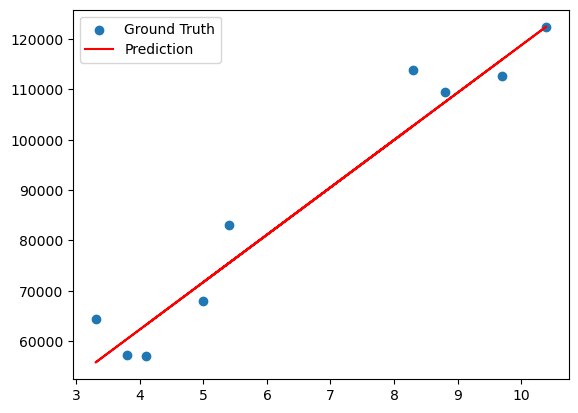

In [29]:
y_pred = lr.predict(x_test)

print('MSE:', mse(y_test, y_pred))

plt.scatter(x_test, y_test, label='Ground Truth')
plt.plot(x_test, y_pred, color='red', label='Prediction')
plt.legend()
plt.show()

#### Multiple Linear Regression Test

In [126]:
df = pd.read_csv('datasets/multiple_linear_regression_dataset.csv')

In [127]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [128]:
x = df[['age', 'experience']]
y = df['income']

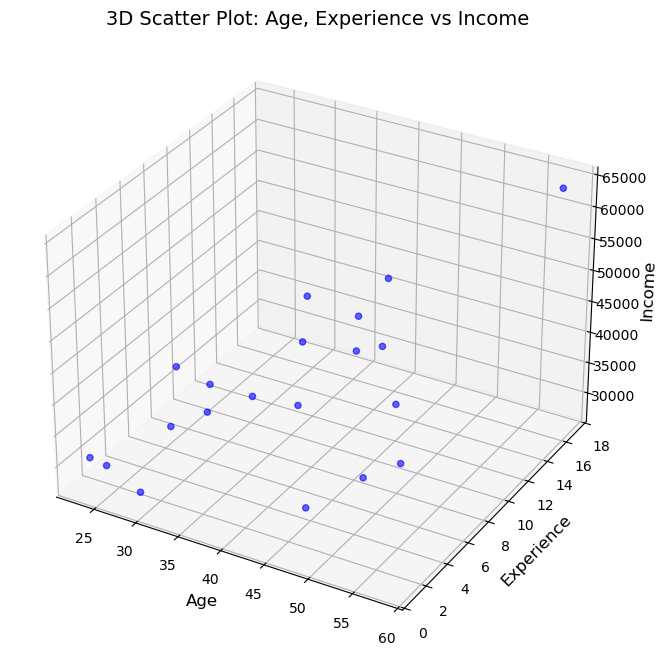

In [129]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['age'], x['experience'], y, c='blue', marker='o', alpha=0.6)

ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Experience', fontsize=12)
ax.set_zlabel('Income', fontsize=12)
ax.set_title('3D Scatter Plot: Age, Experience vs Income', fontsize=14)

plt.show()

In [130]:
def normalize(features: NDArray):
    features_copy = features.copy().astype(np.float64)
    for feature in features_copy.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange 
    return features_copy

In [131]:
x_normalized = normalize(x.values)

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y.values, test_size=0.3)

In [169]:
mlr = LinearRegression()

In [170]:
_ = mlr.fit(x_train, y_train, epochs=1000, lr=0.3, gd_variant='sgd') 

Epoch: 1000/1000 ❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚❚ 100% | MSE: 1701010.9708


MSE: 1504411.7296829002


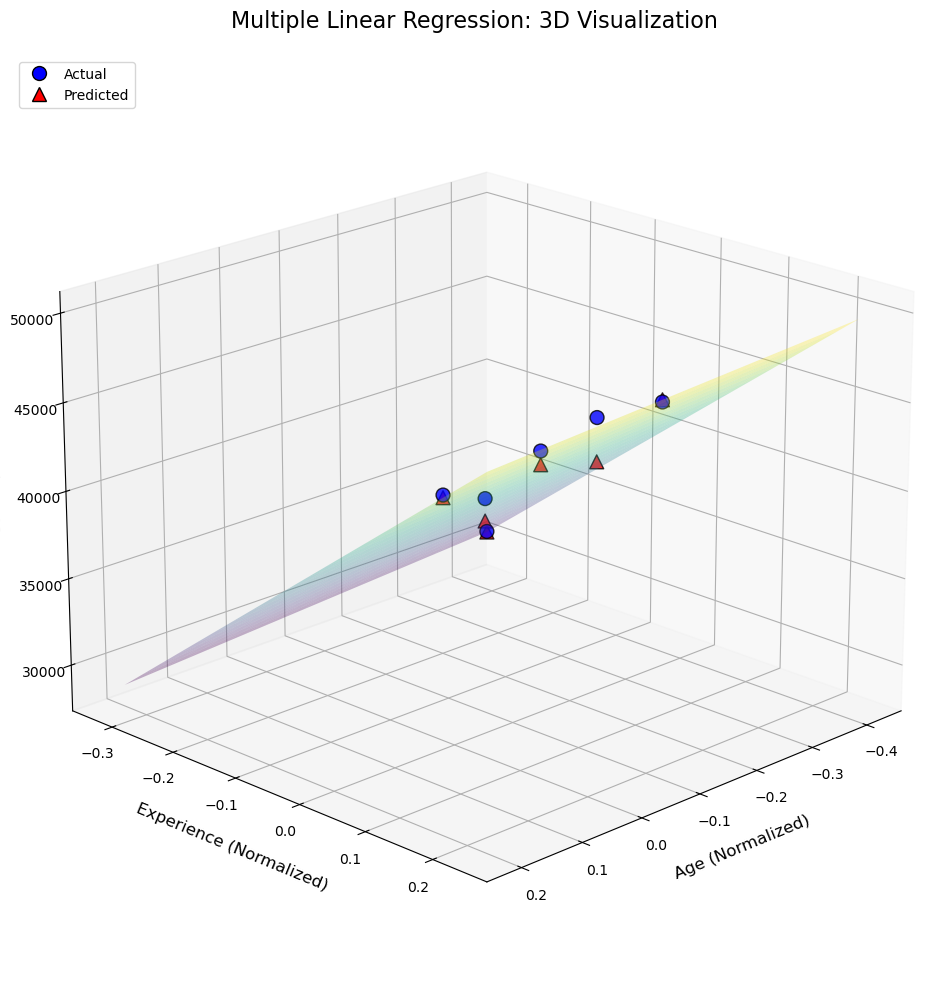

In [171]:
y_pred = mlr.predict(x_test)

print('MSE:', mse(y_test, y_pred))

# Create meshgrid for the regression plane
age_range = np.linspace(x_test[:, 0].min(), x_test[:, 0].max(), 20)
exp_range = np.linspace(x_test[:, 1].min(), x_test[:, 1].max(), 20)
age_mesh, exp_mesh = np.meshgrid(age_range, exp_range)

# Calculate predicted income for the mesh
X_mesh = np.c_[age_mesh.ravel(), exp_mesh.ravel()]
income_mesh = mlr.predict(X_mesh).reshape(age_mesh.shape)

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the regression plane
surf = ax.plot_surface(age_mesh, exp_mesh, income_mesh, alpha=0.3, cmap='viridis', 
                        edgecolor='none', label='Regression Plane')

# Plot actual data points
scatter_actual = ax.scatter(x_test[:, 0], x_test[:, 1], y_test, 
                           c='blue', marker='o', s=100, alpha=0.8, 
                           edgecolors='black', linewidths=1, label='Actual')

# Plot predicted points
scatter_pred = ax.scatter(x_test[:, 0], x_test[:, 1], y_pred, 
                         c='red', marker='^', s=100, alpha=0.8, 
                         edgecolors='black', linewidths=1, label='Predicted')

# Labels and title
ax.set_xlabel('Age (Normalized)', fontsize=12, labelpad=10)
ax.set_ylabel('Experience (Normalized)', fontsize=12, labelpad=10)
ax.set_zlabel('Income', fontsize=12, labelpad=10)
ax.set_title('Multiple Linear Regression: 3D Visualization', fontsize=16, pad=20)

# Set viewing angle
ax.view_init(elev=20, azim=45)

# Add grid
ax.grid(True, alpha=0.3)

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
           markersize=10, label='Actual', markeredgecolor='black'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='red', 
           markersize=10, label='Predicted', markeredgecolor='black'),
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

### Momentum 

\begin{align*}
    f(x, y) &= \frac{1}{2} x^2 + 10y^2
    \\ \\
    \nabla f &= \begin{bmatrix}
        x \\
        20y
    \end{bmatrix}
    \\ \\
    \text{Say, the initial weights are:} \\
    \begin{bmatrix}
        x \\
        y
    \end{bmatrix}_1 &= \begin{bmatrix}
        10 \\
        1
    \end{bmatrix}
    \\ \\
    \begin{bmatrix}
        x \\
        y
    \end{bmatrix}_2 &= \begin{bmatrix}
        10 \\
        1
    \end{bmatrix} - 0.1 \begin{bmatrix}
        10 \\
        20
    \end{bmatrix} 
\end{align*}

10.739044147071729


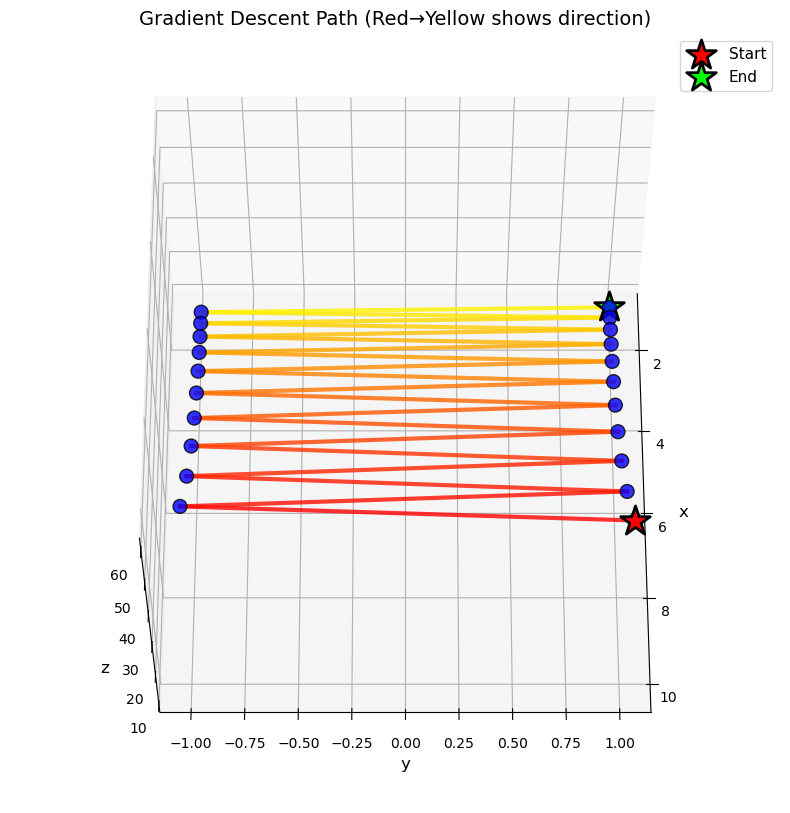

In [ ]:
weight = np.array([10, 1], dtype=np.float64)
history = [weight.copy()]

for _ in range(20):
    grad = np.array([weight[0] * 1, weight[1] * 20], dtype=np.float64)
    weight -= 0.1 * grad
    
    history.append(weight.copy())
    
output = np.array([(0.5 * x**2) + (10 * y**2) for x, y in history])
history = np.array(history)

print(output[-1])

xs, ys, zs = history[:, 0], history[:, 1], output
steps = np.arange(len(xs))

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(history[:, 0], history[:, 1], output, 
           c='blue', marker='o', s=100, alpha=0.8, 
           edgecolors='black', linewidths=1)

n_points = len(history)
for i in range(n_points - 1):
    color_intensity = i / (n_points - 1)
    color = (1.0, color_intensity, 0.0)
    
    ax.plot3D([history[i, 0], history[i+1, 0]], 
              [history[i, 1], history[i+1, 1]], 
              [output[i], output[i+1]], 
              color=color, linewidth=3, alpha=0.8)

ax.scatter([history[0, 0]], [history[0, 1]], [output[0]], 
           c='red', marker='*', s=500, edgecolors='black', 
           linewidths=2, label='Start', zorder=10)
ax.scatter([history[-1, 0]], [history[-1, 1]], [output[-1]], 
           c='lime', marker='*', s=500, edgecolors='black', 
           linewidths=2, label='End', zorder=10)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
ax.set_title('Gradient Descent Path (Red→Yellow shows direction)', fontsize=14)
ax.legend(fontsize=11)

ax.view_init(elev=60, azim=0)

plt.show()

1.9138771781806176


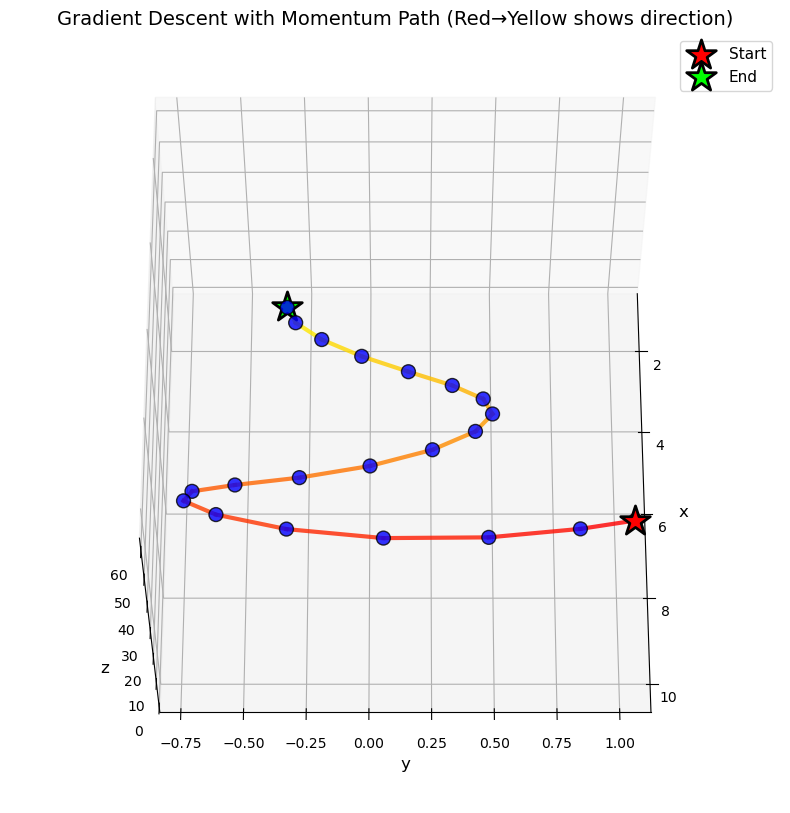

In [121]:
lr = 0.1
momentum = 0.9
velocity = np.array([0, 0])
weight = np.array([10, 1], dtype=np.float64)
history = [weight.copy()]

for _ in range(20):
    grad = np.array([weight[0] * 1, weight[1] * 20], dtype=np.float64)
    velocity = momentum * velocity + (1 - momentum) * grad 
    weight -= lr * velocity
    
    history.append(weight.copy())
    
output = np.array([(0.5 * x**2) + (10 * y**2) for x, y in history])
history = np.array(history)

print(output[-1])

xs, ys, zs = history[:, 0], history[:, 1], output
steps = np.arange(len(xs))

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(history[:, 0], history[:, 1], output, 
           c='blue', marker='o', s=100, alpha=0.8, 
           edgecolors='black', linewidths=1)

n_points = len(history)
for i in range(n_points - 1):
    color_intensity = i / (n_points - 1)
    color = (1.0, color_intensity, 0.0)
    
    ax.plot3D([history[i, 0], history[i+1, 0]], 
              [history[i, 1], history[i+1, 1]], 
              [output[i], output[i+1]], 
              color=color, linewidth=3, alpha=0.8)

ax.scatter([history[0, 0]], [history[0, 1]], [output[0]], 
           c='red', marker='*', s=500, edgecolors='black', 
           linewidths=2, label='Start', zorder=10)
ax.scatter([history[-1, 0]], [history[-1, 1]], [output[-1]], 
           c='lime', marker='*', s=500, edgecolors='black', 
           linewidths=2, label='End', zorder=10)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
ax.set_title('Gradient Descent with Momentum Path (Red→Yellow shows direction)', fontsize=14)
ax.legend(fontsize=11)

ax.view_init(elev=60, azim=0)

plt.show()
